## Scikit-learn (sklearn)

### Primera aplicación, clasificación de "irises"
<span><img src="http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png" alt="drawing" style="width: 200px;"/> <img src="http://www.spataru.at/iris-dataset-svm/iris_types.jpg" alt="drawing" style="width: 500px;"/></span>

El dataset Fisher's Iris es un conjunto de datos multivariado introducido por Ronald Fisher en su paper de 1936 *The use of multiple measurements in taxonomic problems* como un ejemplo de análisis discriminante lineal.



In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris_dataset = load_iris()

#### Paso 0: exploración del objeto ```iris_dataset```


In [2]:
print("Componentes del iris_dataset: {}".format(iris_dataset.keys()))
print("Nombres de categorías a aprender (target): {}".format(iris_dataset['target_names']))
print("Nombres de features: {}".format(iris_dataset['feature_names']))
print("Dimensión de los datos: {}".format(iris_dataset['data'].shape))
print("Primeras 5 filas:\n{}".format(iris_dataset['data'][:5]))
print("Dimensión del target: {}".format(iris_dataset['target'].shape))
print("Target primeras 5 filas:\n{}".format(iris_dataset['target'][:5]))
print("Target últimas 5 filas:\n{}".format(iris_dataset['target'][-5:]))

#print(iris_dataset.DESCR)

Componentes del iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Nombres de categorías a aprender (target): ['setosa' 'versicolor' 'virginica']
Nombres de features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dimensión de los datos: (150, 4)
Primeras 5 filas:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Dimensión del target: (150,)
Target primeras 5 filas:
[0 0 0 0 0]
Target últimas 5 filas:
[2 2 2 2 2]


#### Paso 1: División de datos (training - testing)


In [3]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.1)

print("X_train dimensión: {}".format(X_train.shape))
print("y_train dimensión: {}".format(y_train.shape))

print("X_test dimensión: {}".format(X_test.shape))
print("y_test dimensión: {}".format(y_test.shape))

X_train dimensión: (135, 4)
y_train dimensión: (135,)
X_test dimensión: (15, 4)
y_test dimensión: (15,)


#### Paso 2: Exploración de los datos


In [4]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,3.1,1.5,0.1
1,6.0,2.9,4.5,1.5
2,5.5,2.6,4.4,1.2
3,4.8,3.0,1.4,0.3
4,5.4,3.9,1.3,0.4
5,5.6,2.8,4.9,2.0
6,5.6,3.0,4.5,1.5
7,4.8,3.4,1.9,0.2
8,4.4,2.9,1.4,0.2
9,6.2,2.8,4.8,1.8


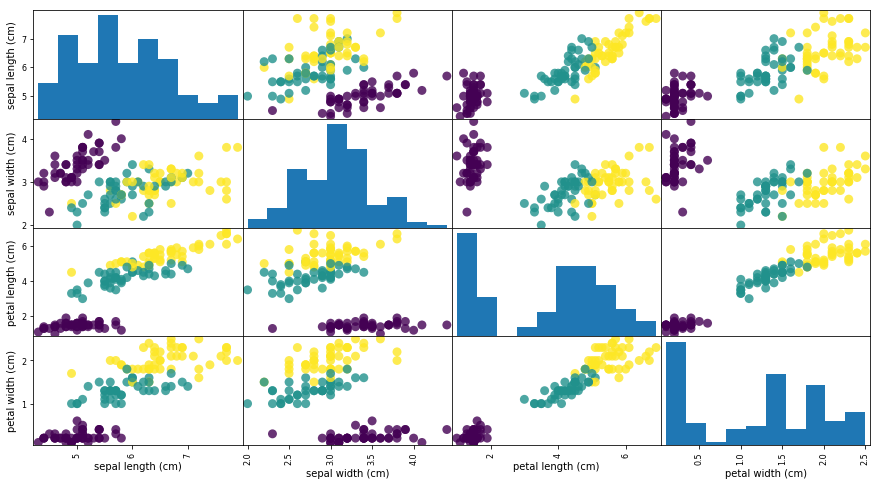

In [5]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, s=80, figsize=(15, 8), marker='o', alpha=.8);

#### Paso 3: Construcción de un modelo (Árbol de Decisió)

In [6]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")

arbol.fit(X_train, y_train);

#### Paso 4: Predecir

In [7]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))


X_new.shape: (1, 4)


In [8]:
prediction = arbol.predict(X_new)
print("Predicción: {}".format(prediction))
print("Nombre del target predicho: {}".format(
       iris_dataset['target_names'][prediction]))

Predicción: [0]
Nombre del target predicho: ['setosa']


#### Paso 5: Evaluación del modelo

In [9]:
y_pred = arbol.predict(X_test)

print("Predicciones sobre el test set:\n {}".format(y_pred))
print("Score sobre el test set: {:.2f}".format(np.mean(y_pred == y_test))) # A mano
print("Score sobre el test set: {:.2f}".format(arbol.score(X_test, y_test))) # usando el método score.

print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=iris_dataset['target_names'], index=iris_dataset['target_names']))

Predicciones sobre el test set:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Score sobre el test set: 1.00
Score sobre el test set: 1.00
Matriz de confusión:


,setosa,versicolor,virginica
setosa,3,0,0
versicolor,0,8,0
virginica,0,0,4


### En resumen


In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=1234, test_size=0.1)

arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")
arbol.fit(X_train, y_train)

print("Score sobre el training set: {:.2f}".format(arbol.score(X_train, y_train)), "¿para qué sirve este número?")
print("Score sobre el test set: {:.2f}".format(arbol.score(X_test, y_test)))


Score sobre el training set: 0.97 ¿para qué sirve este número?
Score sobre el test set: 1.00


### Ejercicios Árboles de Decisión: 

1. Resolver el problema anterior utilizando árboles de decisión de sklearn.
1. Graficar el árbol obtenido (ver función `dibujar_arbol`). 
1. Probar distintos valores para: `max_depth` y graficar la performance sobre test al variar este parámetro. 
1. ¿Qué ocurre con la performance con el valor testeando sobre train? 
1. ¿Cuál es el máximo valor de profundidad que se alcanza? ¿por qué? 
1. ¿Qué ocurre si cambiamos el parámetro `splitter` a `splitter="random"`? ¿Qué profundidad se alcanza?
1. Plotear la importancia de features para cualquiera de los clasificadores encontrados. 

In [11]:
# !pip install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from sklearn.externals.six import StringIO  
from IPython.display import Image, display
import pydotplus

    
def dibujar_arbol(clf):
    dot_data = StringIO()
    sklearn.tree.export_graphviz(clf, out_file=dot_data,  
                    filled=True, 
                    class_names = iris_dataset.target_names,
                    feature_names=iris_dataset.feature_names,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

#### Exercises 1 and 2

In [12]:
# Split again but in a stratified fashion

seed = 1234
np.random.seed(seed)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size = 0.1, stratify = iris_dataset['target']
)

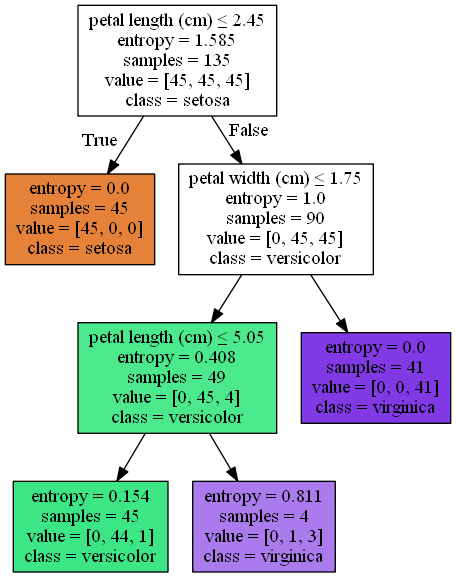

,setosa,versicolor,virginica
setosa,5,0,0
versicolor,0,4,1
virginica,0,1,4


In [13]:
def example_tree_classifier_score(X_train, y_train, X_test, Y_test):    
    _tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=seed)
    _tree.fit(X_train, y_train)
    dibujar_arbol(_tree)

    _y_pred = _tree.predict(X_test)
    _confusion_matrix = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=_y_pred)
    
    return pd.DataFrame(data=_confusion_matrix, index=iris_dataset['target_names'], columns=iris_dataset['target_names'])


example_tree_classifier_score(X_train, y_train, X_test, y_test)

#### Exercise 3

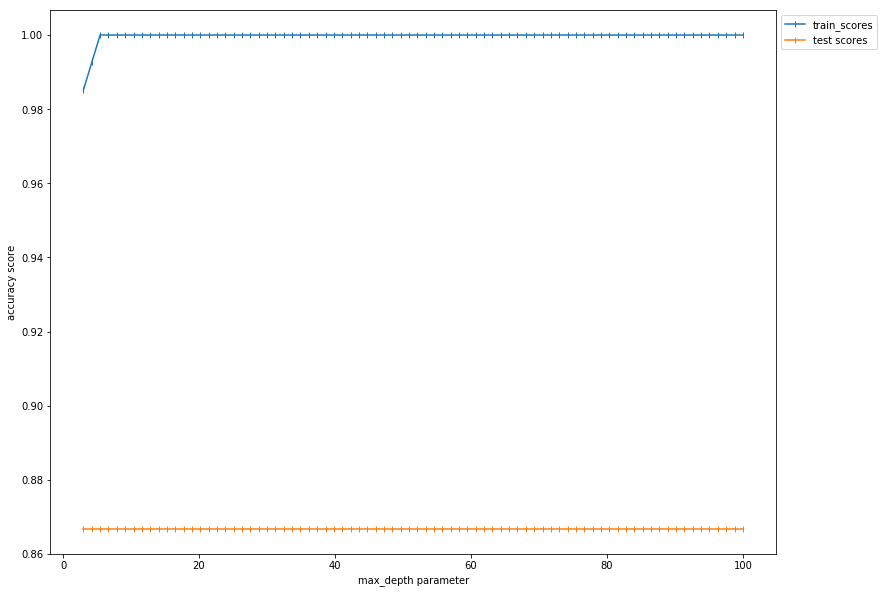

In [14]:
def tree_train_test_scores_with_depth(_max_depth, _X_train, _y_train, _X_test, _y_test, _criterion='entropy', _splitter='best'):
    _tree = DecisionTreeClassifier(max_depth=_max_depth, criterion=_criterion, splitter=_splitter)
    _tree.fit(_X_train, _y_train)
    return _tree, _tree.score(_X_train, _y_train), _tree.score(_X_test, _y_test)

def plot_x_and_y_values(x_values, y_values, x_label, y_label):
    plt.figure(figsize=(13,10))
    
    for _y_values, _label in y_values:
        plt.plot(x_values, _y_values,'|-', label=_label)

    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()
    return
    
def plot_tree_train_test_accuracy_score_as_max_depth_increse(depth_values, _X_train, _y_train, _X_test, _y_test, _splitter='best'):
    train_scores = []
    test_scores = []
    
    for _depth in max_depth_considered:
        _, _train_score, _test_score = tree_train_test_scores_with_depth(
            _depth, _X_train, _y_train, _X_test, _y_test, _splitter=_splitter
        )
        train_scores.append(_train_score)
        test_scores.append(_test_score)

    plot_x_and_y_values(
        depth_values,
        [(train_scores, 'train_scores'), (test_scores, 'test scores')],
        'max_depth parameter',
        'accuracy score'
    )


max_depth_considered = np.linspace(3, 100, 80)

plot_tree_train_test_accuracy_score_as_max_depth_increse(max_depth_considered, X_train, y_train, X_test, y_test)

#### Exercise 5

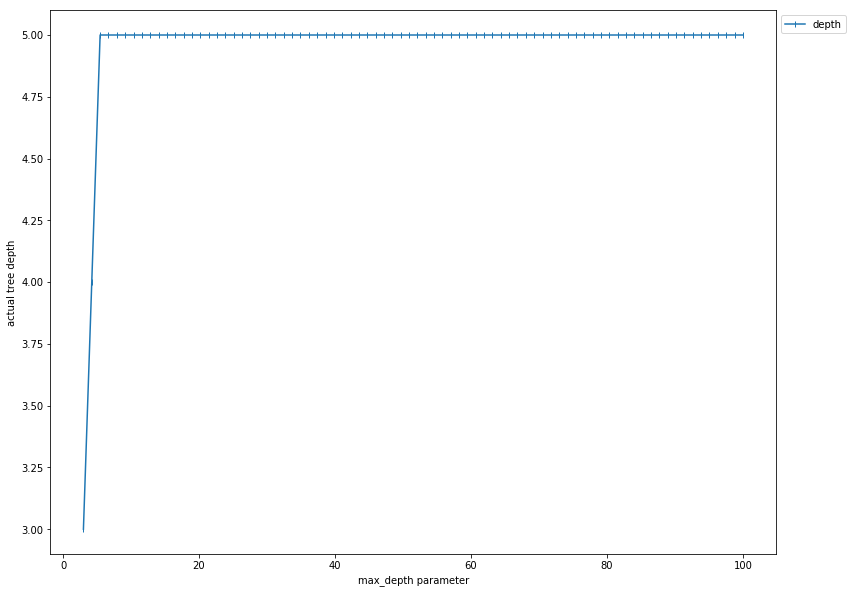

In [15]:
def calculate_decision_tree_classifier_depth(classifier):
    depth_used = 0
    children_left = classifier.tree_.children_left
    children_right = classifier.tree_.children_right
    
    stack = [(0, 0)]  # BFS from root (depth -1) keeping (node_id, depth)
    
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        depth_used = max(depth_used, parent_depth)

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
    
    return depth_used



def plot_tree_depth_as_max_depth_increse(depth_values, _X_train, _y_train, _X_test, _y_test, _splitter='best'):
    depths_used = []
    
    for _depth in max_depth_considered:
        _tree, _, _ = tree_train_test_scores_with_depth(_depth, _X_train, _y_train, _X_test, _y_test, _splitter=_splitter)
        depths_used.append(calculate_decision_tree_classifier_depth(_tree))

    plot_x_and_y_values(depth_values, [(depths_used, 'depth')], 'max_depth parameter', 'actual tree depth')
    return

plot_tree_depth_as_max_depth_increse(max_depth_considered, X_train, y_train, X_test, y_test)

#### Exercise 6

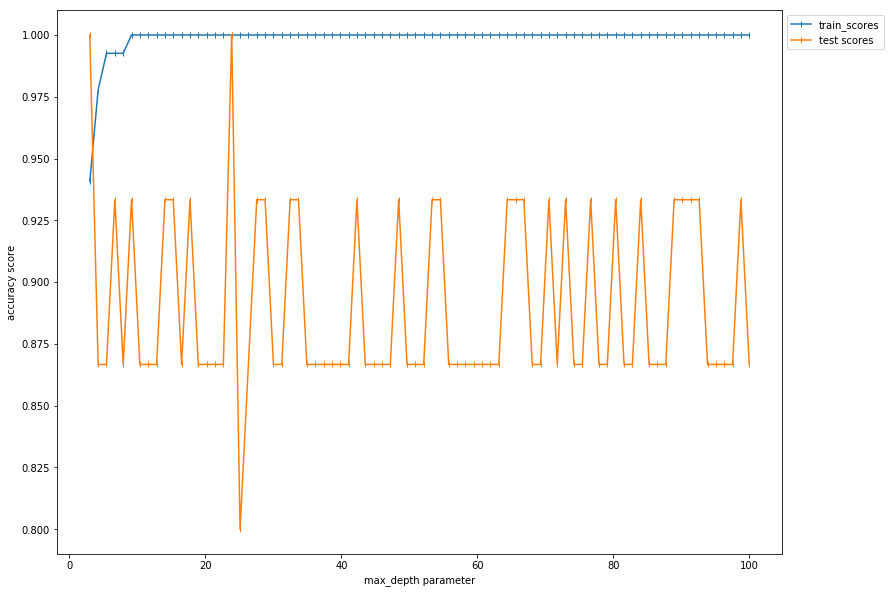

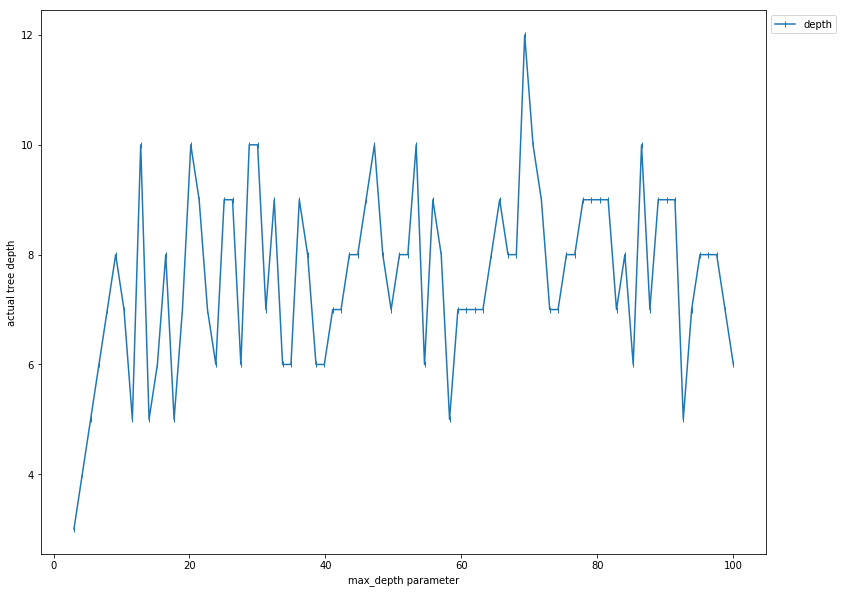

In [16]:
plot_tree_train_test_accuracy_score_as_max_depth_increse(
    max_depth_considered, X_train, y_train, X_test, y_test, _splitter='random'
)
plot_tree_depth_as_max_depth_increse(
    max_depth_considered, X_train, y_train, X_test, y_test, _splitter='random'
)

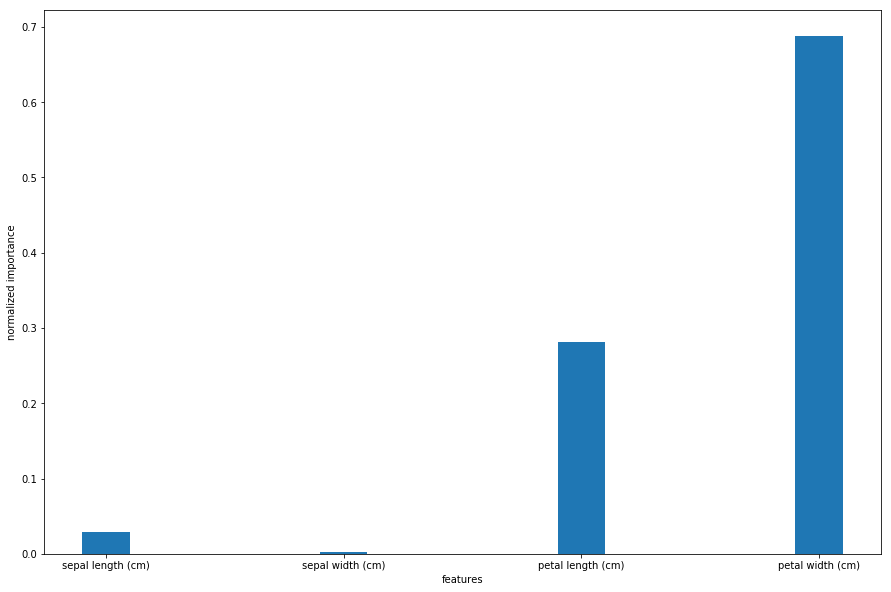

In [21]:
def bar_plot_values(values, bar_names, x_label, y_label):
    plt.figure(figsize=(15,10))
    plt.bar(x=np.linspace(0,12,4), height=_data, tick_label=bar_names)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()
    return

def plot_mean_feature_importance_as_depth_increses(max_depths_used, _X_train, _y_train, _X_test, _y_test, _splitter='best'):
    feature_importances = []
    
    for _depth in max_depths_used:
        _tree_classifier, _, _ = tree_train_test_scores_with_depth(
            _depth, _X_train, _y_train, _X_test, _y_test, _splitter=_splitter
        )
        feature_importances.append(_tree_classifier.feature_importances_)
    return np.array(feature_importances).mean(axis=0)

_data = plot_mean_feature_importance_as_depth_increses(max_depth_considered, X_train, y_train, X_test, y_test)

bar_plot_values(_data, iris_dataset['feature_names'], 'features', 'normalized importance')